<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/W3_L3V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Degree 1: Training MSE = 0.0828, Cross-Validation MSE = 0.1083
Degree 2: Training MSE = 0.0349, Cross-Validation MSE = 0.0377
Degree 3: Training MSE = 0.0347, Cross-Validation MSE = 0.0365
Degree 4: Training MSE = 0.0316, Cross-Validation MSE = 0.0456
Degree 5: Training MSE = 0.0315, Cross-Validation MSE = 0.0445
Degree 6: Training MSE = 0.0315, Cross-Validation MSE = 0.0450
Degree 7: Training MSE = 0.0314, Cross-Validation MSE = 0.0440
Degree 8: Training MSE = 0.0309, Cross-Validation MSE = 0.0480
Degree 9: Training MSE = 0.0299, Cross-Validation MSE = 0.0508
Degree 10: Training MSE = 0.0299, Cross-Validation MSE = 0.0512

Best polynomial degree: 3
Test MSE with degree-3 polynomial: 0.0177


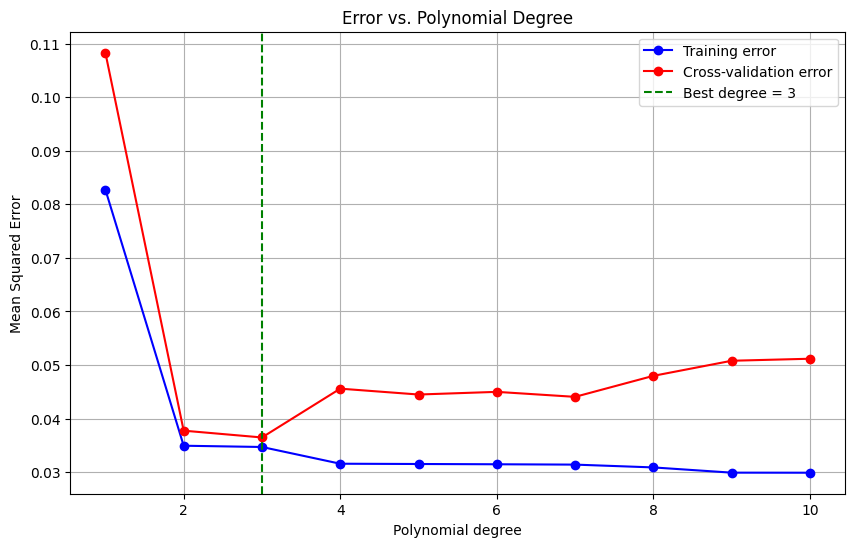

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate some sample data (housing prices example)
np.random.seed(42)
X = 2 * np.random.rand(100, 1) - 1  # House size (normalized)
y = 1 + 2 * X + 0.7 * X**2 + 0.3 * X**3 + np.random.randn(100, 1) * 0.2  # Price

# Split into training, cross-validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Try different polynomial degrees and find the best one
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cv_errors = []
train_errors = []

for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_cv_poly = poly_features.transform(X_cv)

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Calculate errors
    train_pred = model.predict(X_train_poly)
    cv_pred = model.predict(X_cv_poly)

    train_error = mean_squared_error(y_train, train_pred)
    cv_error = mean_squared_error(y_cv, cv_pred)

    train_errors.append(train_error)
    cv_errors.append(cv_error)

    print(f"Degree {degree}: Training MSE = {train_error:.4f}, Cross-Validation MSE = {cv_error:.4f}")

# Find best model (lowest CV error)
best_degree = degrees[np.argmin(cv_errors)]
print(f"\nBest polynomial degree: {best_degree}")

# Evaluate best model on test set
poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

best_model = LinearRegression()
best_model.fit(X_train_poly, y_train)

test_pred = best_model.predict(X_test_poly)
test_error = mean_squared_error(y_test, test_pred)
print(f"Test MSE with degree-{best_degree} polynomial: {test_error:.4f}")

# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, 'b-o', label='Training error')
plt.plot(degrees, cv_errors, 'r-o', label='Cross-validation error')
plt.axvline(x=best_degree, color='g', linestyle='--', label=f'Best degree = {best_degree}')
plt.xlabel('Polynomial degree')
plt.ylabel('Mean Squared Error')
plt.title('Error vs. Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()